<a href="https://colab.research.google.com/github/lalitha-sahitya/stock-price-prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
od.download('https://www.kaggle.com/datasets/akshaydattatraykhare/nsetataglobal')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/nsetataglobal


100%|██████████| 26.9k/26.9k [00:00<00:00, 9.42MB/s]

In [74]:
os.listdir('nsetataglobal')

['NSE-TATAGLOBAL11.csv']

In [75]:
data=pd.read_csv('/content/nsetataglobal/NSE-TATAGLOBAL11.csv').set_index('Date')

In [76]:
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...
2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80


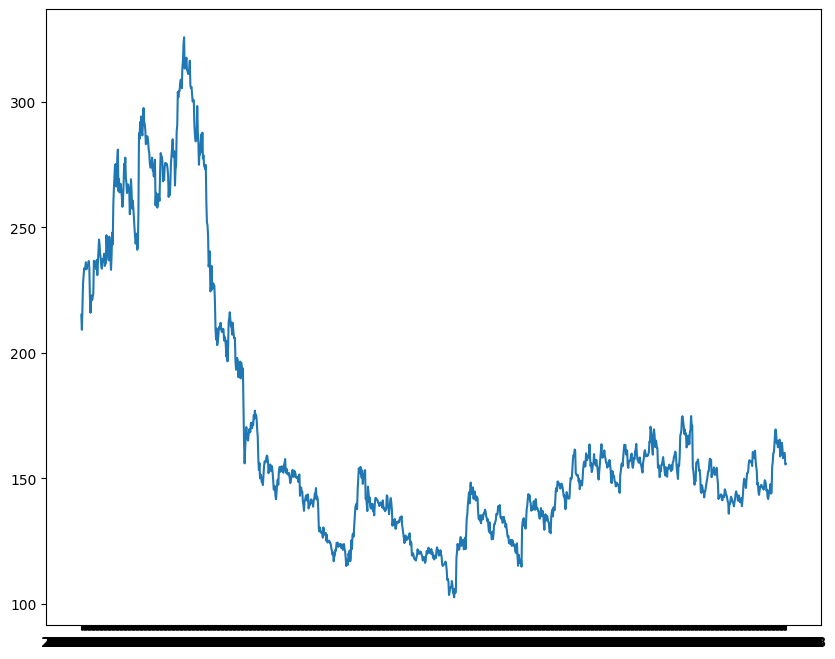

In [77]:
plt.figure(figsize=(10,8))
plt.plot(data['Close'],label='Closing price')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1235 non-null   float64
 1   High                  1235 non-null   float64
 2   Low                   1235 non-null   float64
 3   Last                  1235 non-null   float64
 4   Close                 1235 non-null   float64
 5   Total Trade Quantity  1235 non-null   float64
 6   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7)
memory usage: 77.2+ KB


In [79]:
data['Open-Close']=data['Open']-data['Close']
data['High-Low']=data['High']-data['Low']

In [80]:
data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Open-Close,High-Low
Date,,,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,-7.15,15.40
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,7.80,12.70
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,5.30,11.65
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,2.40,11.75
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,3.65,13.55
...,...,...,...,...,...,...,...,...,...
2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,1.40,3.75
2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,1.10,4.45
2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,-4.15,4.95


In [83]:
x=data[['Open-Close','High-Low']]

In [84]:
x

,Open-Close,High-Low
Date,,
2018-10-08,-7.15,15.40
2018-10-05,7.80,12.70
2018-10-04,5.30,11.65
2018-10-03,2.40,11.75
2018-10-01,3.65,13.55
...,...,...
2013-10-14,1.40,3.75
2013-10-11,1.10,4.45
2013-10-10,-4.15,4.95


In [86]:
y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)
y

array([-1,  1,  1, ..., -1,  1, -1])

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
params={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5,error_score='raise')
model.fit(x_train,y_train)
train_acc=accuracy_score(y_train,model.predict(x_train))
test_acc=accuracy_score(y_test,model.predict(x_test))
print('Training Accuracy:',train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 0.8768898488120951
Testing Accuracy: 0.8478964401294499


In [89]:
preds=model.predict(x_test)

In [90]:
df=pd.DataFrame({'Actual':y_test,'Predicted':preds})
df

,Actual,Predicted
0,-1,-1
1,-1,-1
2,1,1
3,-1,-1
4,-1,-1
...,...,...
304,1,1
305,-1,-1
306,1,1
307,-1,-1
